# Exploratory Data Analysis

The data are from:

- Toxic Comment Classification Challenge ([link](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data))



## Load libraries and data

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path to data
path_tox_com = Path("data", "toxic_comment_clf_challenge.csv")

# Load data
df_tox_com = pd.read_csv(path_tox_com)

## Functions

In [3]:
def value_count_to_str(d: pd.DataFrame, col: str) -> str:
    vc = d[col].value_counts()
    s = "|"
    for i, k in enumerate(vc.keys()):
        # s = f"{vc.keys()[0]}:{vc.values[0]} --- {vc.keys()[1]}:{vc.values[1]}"
        s += f" {k}:{vc.values[i]} |"

    return s

In [4]:
def barpot_text(barplot: sns.barplot, above_top:int=300) -> None:
    for p in barplot.patches:
        barplot.text(
            p.get_x() + p.get_width() / 2, # x = center of the bar
            p.get_height() + above_top, # y = above the top of the bar
            f"{p.get_height():.0f}", # text = height of the bar (i.e, counts)
            ha="center", # horizontal alignment
            va="center", # vertical alignment
            fontsize=12,
            color="red"
        )

# Viz

In [5]:
df_tox_com.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df_tox_com.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df_tox_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


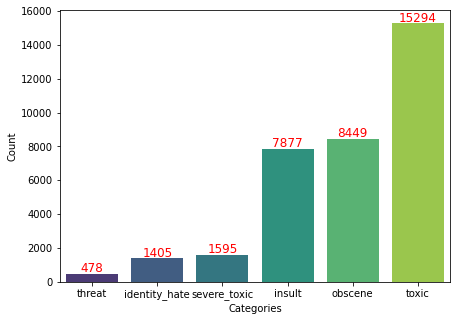

In [8]:
column_categories = df_tox_com.columns.tolist()[2:]
train_label_counts = df_tox_com[column_categories].sum().sort_values()

plt.figure(figsize=(7, 5))
barplot = sns.barplot(
    y=train_label_counts.values, 
    x=train_label_counts.index,
    palette="viridis")
barpot_text(barplot)
plt.xlabel("Categories")
plt.ylabel("Count")
plt.show() 

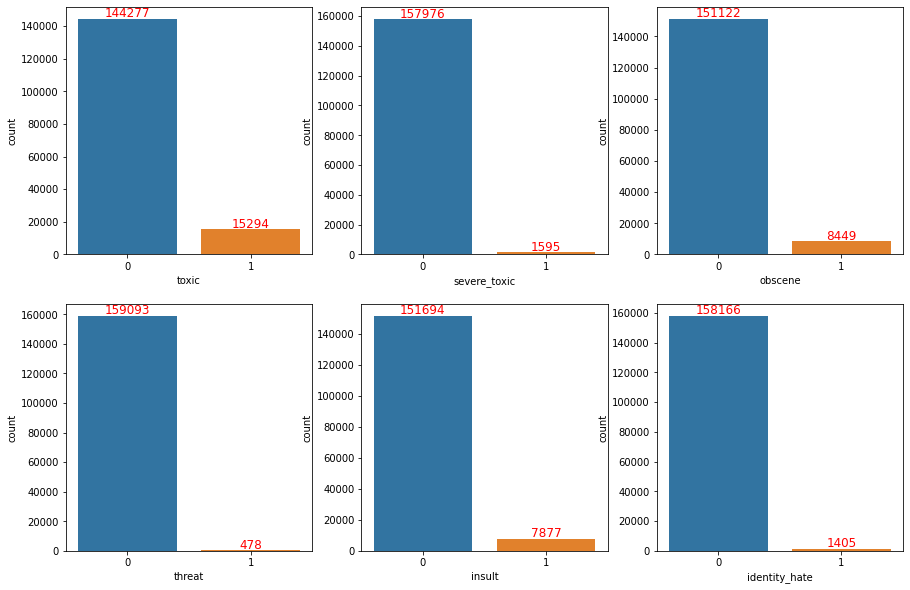

In [9]:
col_title = "blue"

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
countplot = sns.countplot(x="toxic", data=df_tox_com)
barpot_text(countplot, 3500)
# plt.title(value_count_to_str(df_tox_com, "toxic"), color=col_title)

plt.subplot(2, 3, 2)
countplot = sns.countplot(x="severe_toxic", data=df_tox_com)
barpot_text(countplot, 3500)
# plt.title(value_count_to_str(df_tox_com, "severe_toxic"), color=col_title)

plt.subplot(2, 3, 3)
countplot = sns.countplot(x="obscene", data=df_tox_com)
barpot_text(countplot, 3500)
# plt.title(value_count_to_str(df_tox_com, "obscene"), color=col_title)

plt.subplot(2, 3, 4)
countplot = sns.countplot(x="threat", data=df_tox_com)
barpot_text(countplot, 3500)
# plt.title(value_count_to_str(df_tox_com, "threat"), color=col_title)

plt.subplot(2, 3, 5)
countplot = sns.countplot(x="insult", data=df_tox_com)
barpot_text(countplot, 3500)
# plt.title(value_count_to_str(df_tox_com, "insult"), color=col_title)

plt.subplot(2, 3, 6)
countplot = sns.countplot(x="identity_hate", data=df_tox_com)
barpot_text(countplot, 3500)
# plt.title(value_count_to_str(df_tox_com, "identity_hate"), color=col_title)

plt.show()

In [10]:
from wordcloud import WordCloud, STOPWORDS

In [11]:
df_only_toxic = df_tox_com[df_tox_com[column_categories].sum(axis=1) > 0]
df_no_toxic = df_tox_com[df_tox_com[column_categories].sum(axis=1) == 0]

In [12]:
df_tox_com["comment_text"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 159571 entries, 0 to 159570
Series name: comment_text
Non-Null Count   Dtype 
--------------   ----- 
159571 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


In [13]:
text_jointed_all = " ".join(df_tox_com["comment_text"])
text_jointed_only_toxic = " ".join(df_only_toxic["comment_text"])
text_jointed_no_toxic = " ".join(df_no_toxic["comment_text"])

In [14]:
wordcloud_all = WordCloud(
    width = 800,
    height = 800,
    background_color ='black',
    stopwords = STOPWORDS,
    min_font_size = 10).generate(text_jointed_all)

In [15]:
wordcloud_only_toxic = WordCloud(
    width = 800,
    height = 800,
    background_color ='black',
    stopwords = STOPWORDS,
    min_font_size = 10).generate(text_jointed_only_toxic)

In [16]:
wordcloud_no_toxic = WordCloud(
    width = 800,
    height = 800,
    background_color ='black',
    stopwords = STOPWORDS,
    min_font_size = 10).generate(text_jointed_no_toxic)

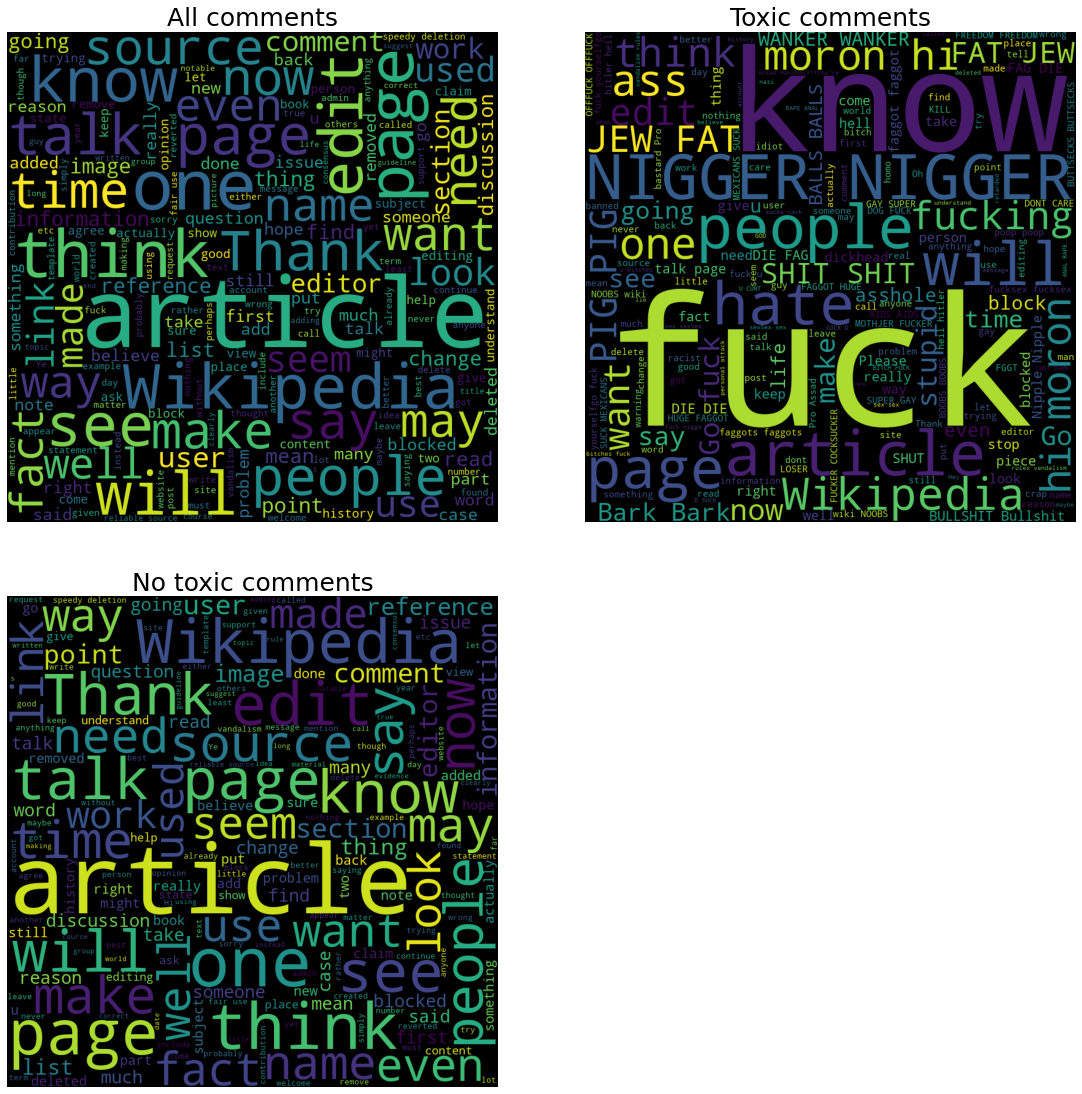

In [17]:
plt.figure(figsize = (15, 15), facecolor = None)

plt.subplot(2, 2, 1)
plt.imshow(wordcloud_all)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("All comments", fontsize=25)
 
plt.subplot(2, 2, 2)
plt.imshow(wordcloud_only_toxic)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Toxic comments", fontsize=25)

plt.subplot(2, 2, 3)
plt.imshow(wordcloud_no_toxic)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("No toxic comments", fontsize=25)

plt.subplots_adjust(wspace=0.15)
plt.subplots_adjust(hspace=0.15)
plt.show()